<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:180%;
           font-family:Verdana;
           letter-spacing:0.9px
            ;">

<p style="padding: 17px;
              color:white;">
 SENTIMENT ANALYSIS OF ALEXA REVIEWS 🏆
</p>
</div>


![Alexa](https://www.rcrwireless.com/wp-content/uploads/2017/12/Alexa_Home_Banner.jpg)
> Image From *rcrwireless.com*

<div style="color:white;
           display:fill;
           border-radius:8px;
           background-color:#5642C5;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.9px;">

<p style="padding: 10px;      text-align: center;
              color:white;">
 Table of Contents
</p>
</div>

* [*1.PREFACE*](#PREFACE)

* [*2.LIBRARIES*](#LIBRARIES)

* [*3.DATA*](#DATA)
  * [About the data 3.1](#aboutdata_3_1)
  

* [*4.EDA(Exploratory data analysis)*](#EDA)
  * [Exploring the Variables 3.1](#Exploringvar_4_1)

* [*5.Feature Slelection*](#Feature_Slelection)
* [*6.NLP(natural language processing)*](#nlp)
  * [6.1.Pre-processing the raw Reviews 6.1](#preprocessing_reviews_6_1)
    * [6.1.1.Tokenisation  ](#Tokenisation_6.1.1)
    * [6.1.2.Stopwords Removal ](#StopwordsRemoval_6.1.2)
    * [6.1.3.Lemmatization ](#Tokenisation_6.1.3)
  * [*6.2.WordCloud*](#WordCloud)
  * [*6.3.Split data to Train & Test*](#split)
  * [*6.4.Vectorization*](#vector)
      * [6.4.1.count vectorizer ](#count_vec.6.4.1)
      * [6.4.2.TF-IDF vectorizer ](#TF-IDF)
      

* [*7.MODELLING (MACHINE LEARNING & DEEP LEARNING)*](#modelling)
  * [7.1.Machine Learning Models](#ml.7.1)
    * [7.1.1.Multinomial Naive Bayes with count vectorizer](#mnp_count.7.1.1)
         * [7.1.1.1.Test the model ](#mnp_count.7.1.1.1)
    * [7.1.2.Multinomial Naive Bayes with TF-IDF Vectorizer](#mnp_tf.7.1.2)
         * [7.1.2.1.Test the model ](#mnp_tf.7.1.2.1)
    * [7.1.3.SVM with with count vectorizer](#svm_count)
         * [7.1.3.1.Test the model ](#svm_count.7.1.3.1)
    * [7.1.4.SVM with with TF-IDF vectorizer](#svm_tf)
         * [7.1.4.1.Test the model ](#svm_tf.7.1.4.1)
    * [7.1.5.Adaboost  with count vectorizer](#AdaBoost_count)
         * [7.1.5.1.Test the model ](#test_model_5.7.1.5.1)
    * [7.1.6.Adaboost  with TF-IDF vectorizer](#AdaBoost_tf)
         * [7.1.6.1.Test the model ](#test_model_6.7.1.6.1)
  * [7.2.Deep Learning Models](#ml.7.2)
    * [7.2.1.CNN and LSTM Model](#cnn_lstm_model)
         * [7.2.1.1.Padding and truncating the input training sequences ](#padding)
         * [7.2.1.2.Test the model ](#cnn_lstm_model_test)
  * [8.Results](#results)
    * [8.1 Model comparisons](#Modelcomparisons)
    * [8.2 Custom Reviews](#CustomReviews)
  * [9.Conclusion](#Conclusion)





## <span style="color:#5642C5;">1. PREFACE </span> <a class="anchor"  id="PREFACE"></a>



> **In this project, natural language processing (NLP) techniques will be applied in order to detect large-scale patterns among written reviews provided by customers on alexa devices. The goal of this project is to predict whether customers liked an Alexa device they have purchased using the information in their reviews.**


## <span style="color:#5642C5;"> 2. LIBRARIES </span> <a class="anchor"  id="LIBRARIES"></a>



In [ ]:
import pandas as pd 
import numpy as np
import string
import nltk
import nltk.corpus
import sklearn
import csv
import re
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier


# Modules for visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Tools for preprocessing input data 
from matplotlib import rcParams
import matplotlib as mpl

from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk import NaiveBayesClassifier
from nltk.corpus import wordnet 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.backend import clear_session
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils import class_weight
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import text, sequence 
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import precision_score,accuracy_score, f1_score,recall_score,roc_auc_score,precision_recall_curve, average_precision_score,auc,roc_curve
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

# tokenize the dataset corpus, delete uncommon words such as names.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences       
from IPython.display import display, HTML

from keras.utils.vis_utils import plot_model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
import pickle


## <span style="color:#5642C5;"> 3. DATA </span> <a class="anchor"  id="DATA"></a>


#### <span style="color:#5642C5;"> 3.1 About the data </span> <a class="anchor"  id="aboutdata_3_1"></a>


The data is made up of 3150 rows and 5 column variables. Each row includes a written comment as well as extra information about the customer.

**About the features :**

1. **rating** : the customer's product score, which ranges from 1 to 5, is stored as a positive ordinal integer variable.
2. **date** : integer contain the date of review
3. **variation** :String variable for various amazon Alexa products
4. **verified_reviews** : String variable for the reviews.
5. **feedback** :Integer documenting the number of feedbacks of various amazon Alexa products

#### <span style="color:#5642C5;"> 3.2 Reading the data </span> <a class="anchor"  id="readdata_4_1"></a>


In [ ]:
#load the data 
data = pd.read_csv ("../input/amazon-alexa-reviews/amazon_alexa.tsv", sep = '\t')
data.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [ ]:
#Describe Data
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
# How many reviews we have 
print('There are', data.shape[0], 'reviews')
# check for duplicates 
print("There are",len(data[data.duplicated()]),"duplicates")
# check if we have missing values 
print("There are",data.isnull().sum().sum(),"missing values")

There are 3150 reviews
There are 715 duplicates
There are 0 missing values


In [ ]:
uniqueValues = data.nunique()
print('number of unique values in each column :')
print(uniqueValues)

number of unique values in each column :
rating                 5
date                  77
variation             16
verified_reviews    2301
feedback               2
dtype: int64


> **The data appears to be ready for analysis**

## <span style="color:#5642C5;"> 4. EDA(Exploratory data analysis) </span> <a class="anchor"  id="EDA"></a>


#### <span style="color:#5642C5;"> 4.1 Exploring the Variables </span> <a class="anchor"  id="Exploringvar_4_1"></a>


"Rating" integer variable where Customers who give stars more than three are considered to recommend the product, while less than or equal to three will not recommend the product.

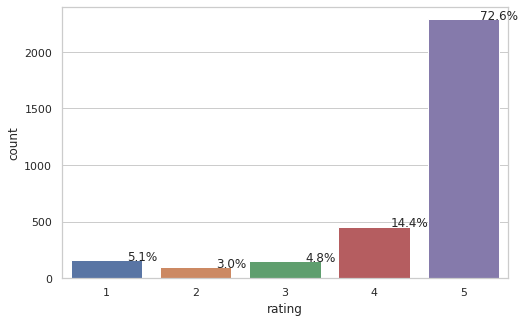

In [ ]:
#exploring of "rating" Variable
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x="rating", data=data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
#  data's categories
categories= pd.DataFrame(data['rating'].apply(lambda x: 1 if (x > 3) else 0) ).to_numpy()
categories

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
#create new  column called sentiment and store the pos for rate over 3 and negaive for the rest 
data['sentiment']= data['rating'].apply(lambda x: "Positive" if (x > 3) else "Negative") 
data.head(40)

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,Positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,Positive
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,Positive
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,Negative
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,Positive
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,Positive
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,Positive


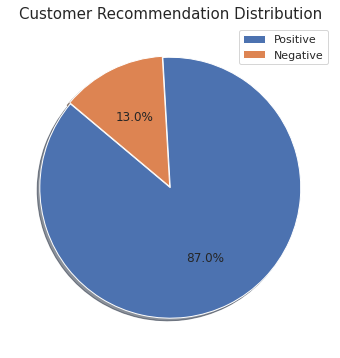

In [ ]:
plt.figure(figsize=(6, 6))

explode = [0, 0.01]
plt.pie(data['sentiment'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Positive', 'Negative'])
plt.title('Customer Recommendation Distribution', fontsize=15)
plt.axis('off');

> **It seems that the majority of customers have given positive feedback about the device**


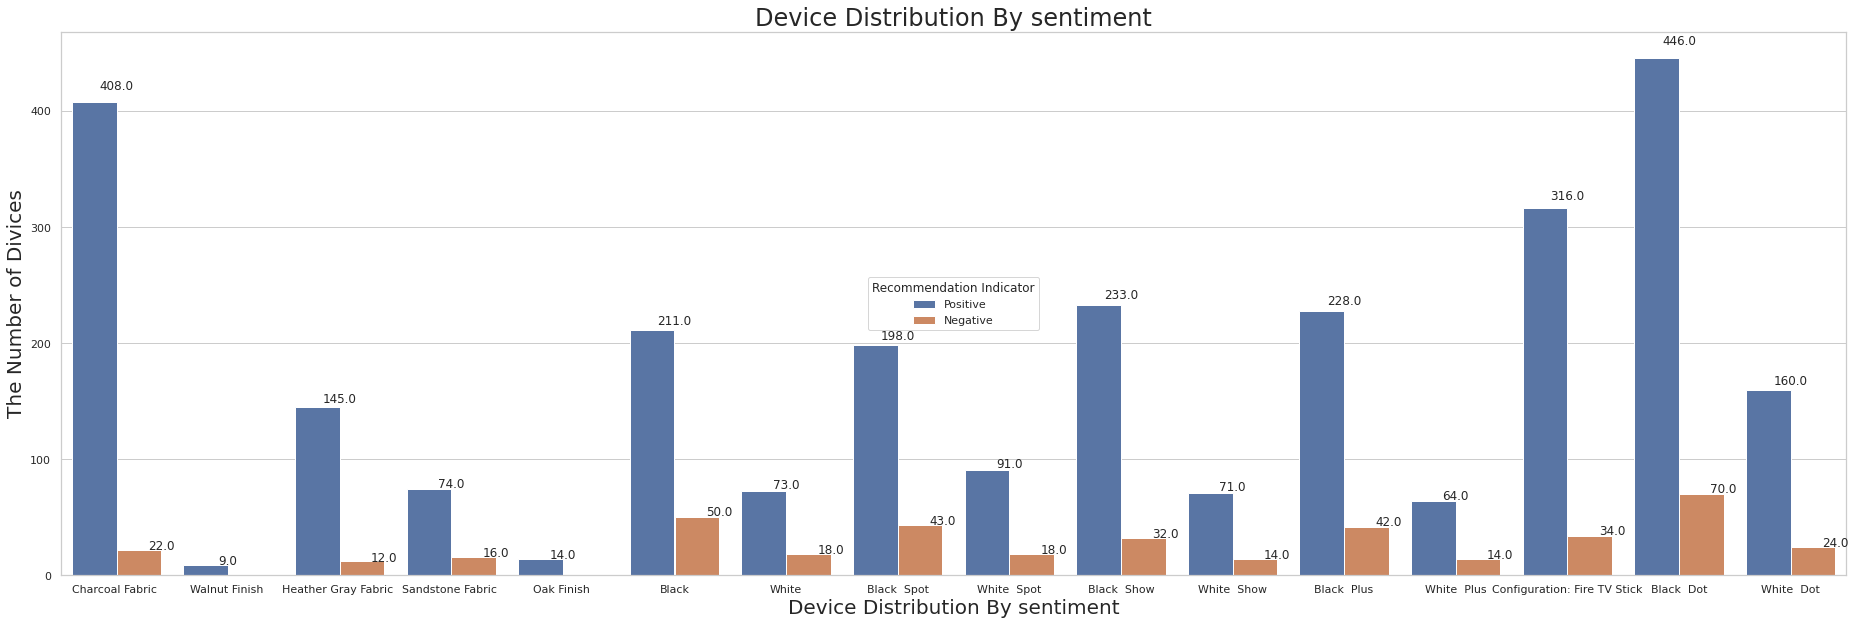

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(32,10))
total = float(len(data))
ax = sns.countplot(x="variation", hue = "sentiment", data=data)

plt.title('Device Distribution By sentiment', fontsize=24)
plt.xlabel("Device Distribution By sentiment", fontsize=20)
plt.ylabel("The Number of Divices", fontsize=20)
plt.legend(title='Recommendation Indicator', loc='center', labels=['Positive', 'Negative'])

for p in ax.patches:        
   # percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()* 1.025
    ax.annotate(p.get_height(), (x, y),ha='center')

plt.show()

"variation" Categorical variable of the device name

In [ ]:
# count the number of different type of devices
data["variation"].value_counts()


Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

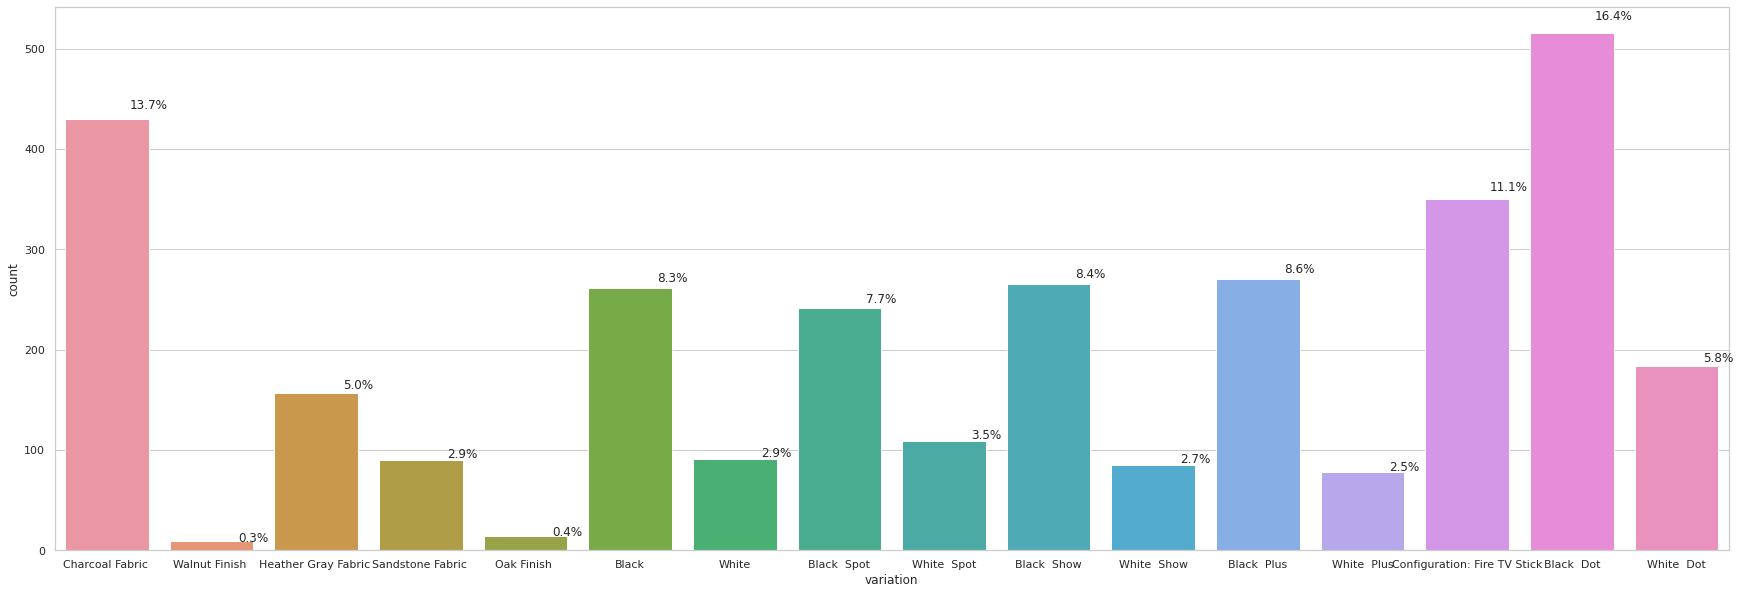

In [ ]:
#exploring of "variation" Variable
sns.set(style="whitegrid")
plt.figure(figsize=(30,10))
total = float(len(data))
ax = sns.countplot(x="variation", data=data)
for p in ax.patches:        
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()* 1.025
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

> **It seems from the graph that "walnut finish" which is the least used by the users in this data, while the "black Dot" is the highest used**


"feedback" Integer documenting the number of feedbacks of various amazon Alexa products

In [ ]:
data["feedback"].value_counts()


1    2893
0     257
Name: feedback, dtype: int64

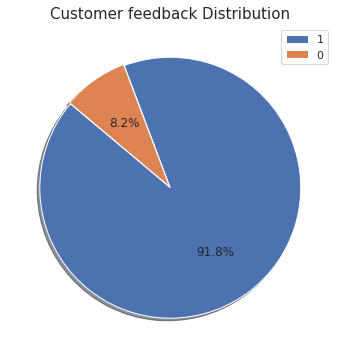

In [ ]:
plt.figure(figsize=(6, 6))
explode = [0, 0.01]
plt.pie(data['feedback'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '0'])
plt.title('Customer feedback Distribution', fontsize=15)
plt.axis('off');

## <span style="color:#5642C5;"> 5. Feature Slelection </span> <a class="anchor"  id="Feature_Slelection"></a>


> For NLP we will keep only the necessary columns such as "verified reviews" and "sentiment" columns and we will drop the rest

In [ ]:
data.drop(["rating",	"date"	,"variation"	,"feedback"], axis=1, inplace=True)
data

,verified_reviews,sentiment
0,Love my Echo!,Positive
1,Loved it!,Positive
2,"Sometimes while playing a game, you can answer...",Positive
3,I have had a lot of fun with this thing. My 4 ...,Positive
4,Music,Positive
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",Positive
3146,"Listening to music, searching locations, check...",Positive
3147,"I do love these things, i have them running my...",Positive
3148,Only complaint I have is that the sound qualit...,Positive


## <span style="color:#5642C5;"> 6. NLP(natural language processing) </span> <a class="anchor"  id="nlp"></a>


> In this section, I'll only look at the review text and sentiment columns to see whether the user's reviews on the device are positive or negative based on the text. This reduces the model's complexity and turns it into a classification binary model.

#### <span style="color:#5642C5;"> **6.1 Pre-processing the raw Reviews** </span> <a class="anchor"  id="preprocessing_reviews_6_1"></a>

> A few techniques will be applied to get our reviews ready for Modelling :

###### <span style="color:#5642C5;"> 6.1.1 Tokenisation </span> <a class="anchor"  id="nlp_6_1"></a>

> Tokenization is a critical stage in the natural language processing process. Tokenization is the process of breaking down a sentence, paragraph, or even an entire text document into smaller parts, such as individual words or phrases. Each of these smaller components is referred to as a token.

> in this project we will be using word tokenize in clean reviews function 

###### <span style="color:#5642C5;"> 6.1.2 Stopwords Removal </span> <a class="anchor"  id="StopwordsRemoval_6.1.2"></a>

> stopwords removal step is a way to remove the unnecessary words that will not add any important information into the reviews

###### <span style="color:#5642C5;"> 6.1.3 Lemmatization </span> <a class="anchor"  id="Tokenisation_6.1.3"></a>

> Another technique will be used called **Lemmatization** instead of using **stemming**. Lemmatization is a powerful technique that can be used to give the root word for a given word but it requires the part of speech of that word. 

> To know more about this technique and the differences between it and stemming i suggest you to have a look into this URL [https://medium.com/geekculture/introduction-to-stemming-and-lemmatization-nlp-3b7617d84e65](http://)


In [ ]:
# create lemmatizer 
lemmatizer = WordNetLemmatizer()

In [ ]:
# function to get the simpler virsion of pos tag  to use  in lemmitazation 
def get_simple_pos(tag):
    if tag.startswith('N') or tag.startswith('J'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN #default case

In [ ]:

# function to clear the reviews from email addresses,URLs,numbers,stopwords patterns and lemmitize the reviews 
def clean_reviews(review):
    clean_words=[]
    # Remove email addresses patterns 
    raw_review = re.sub('\b[\w\-.]+?@\w+?\w+?\.\w{2,4}\b'," ",review)
    # Remove URLs  patterns
    raw_review =re.sub("[^a-zA-Z]"," ",raw_review)
    #Remove numbers
    raw_review= re.sub("\d+(\.\d+)?"," ",raw_review)

    stop_words=set(stopwords.words("english"))
    words_tokens= nltk.word_tokenize(raw_review)  
    for word in words_tokens :

      if word.lower() not in stop_words:
        pos = pos_tag([word]) # get the part of speech of each word 
    
        clean_word=(lemmatizer.lemmatize(word.lower(), pos=get_simple_pos(tag)) for word, tag in pos)
        clean_words.append("".join(clean_word))

    return (" ".join(clean_words))

In [ ]:

# store the cleaned reviews inside clean_reviews_corpus array 
clean_reviews_corpus=[]

for index,review in enumerate(data["verified_reviews"]):
  clean_reviews_corpus.append(clean_reviews(data["verified_reviews"][index]))

In [ ]:
data["verified_reviews"] = data["verified_reviews"].apply(clean_reviews)
data["verified_reviews"].head()

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing yr old learns dinosaur control l...
4                                                music
Name: verified_reviews, dtype: object

In [ ]:
data.head()

,verified_reviews,sentiment
0,love echo,Positive
1,love,Positive
2,sometimes play game answer question correctly ...,Positive
3,lot fun thing yr old learns dinosaur control l...,Positive
4,music,Positive


In [ ]:
# review 5 cleaned  
print("review 5 cleaned {",data["verified_reviews"][5],"}")


review 5 cleaned { receive echo gift need another bluetooth something play music easily accessible found smart speaker wait see else }


In [ ]:
words_values = pd.Series(" ".join(data["verified_reviews"]).split()).value_counts()
print(words_values)
rare_words=words_values[words_values <= 3]
print(rare_words)
print(rare_words.value_counts())


love            1063
echo             868
great            729
use              662
work             650
                ... 
fumble             1
particularly       1
appropriate        1
deployed           1
canary             1
Length: 3121, dtype: int64
print           3
samsung         3
excitement      3
bible           3
project         3
               ..
fumble          1
particularly    1
appropriate     1
deployed        1
canary          1
Length: 1957, dtype: int64
1    1123
2     587
3     247
dtype: int64


In [ ]:
data["verified_reviews"] = data["verified_reviews"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
data["verified_reviews"].head(10)

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing yr old learns control light play...
4                                                music
5    receive echo gift need another bluetooth somet...
6    without use many feature ipad see use great al...
7    think th one purchase work get one every room ...
8                                           look great
9    love listen song heard since get news weather ...
Name: verified_reviews, dtype: object

#### <span style="color:#5642C5;"> **6.2 WordCloud** </span> <a class="anchor"  id="wordcload"></a>

> Visualize the review after cleaning With a Word Cloud which enables us to discover and understand the reviews. It is a word picture in which the size of each word hence, more frequent words appear larger

In [ ]:
# Create function to display wordcload
def create_WordCloud(data, back_ground_color="black",title= None):
  wordcloud=WordCloud(background_color=back_ground_color, max_words=300, max_font_size=30 , scale=3,random_state=1).generate(str(data))
  mpl.rcParams['figure.figsize']=(15,15) 
  mpl.rcParams['font.size']=20  
  #plt.style.use('fast')
  fig = plt.figure(1)
  if title:
    plt.title(title, fontsize= 30)

  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()



In [ ]:
# seprate the pos and neg words 
#Negative_words = " ".join(data[data["verified_reviews"]  =="0"]in categories).split()
Negative_words =[]
Positive_words=[]


#clean_reviews(data["verified_reviews"][index]
for index,num  in enumerate (categories):
    if num == 1:
        Positive_words.append(data["verified_reviews"][index])
    else :
        Negative_words.append(data["verified_reviews"][index])


In [ ]:
Negative_words[:20]

['without use many feature ipad see use great alarm u almost hear alarm bedroom living room reason enough keep fun ask random question hear response seem yet',
 'get second unit bedroom expect sound improve didnt really see difference overall big improvement st generation',
 'speaker sound pretty good small setup pretty easy bought two reason rate follow instruction music unit know do correctly sync purchasing multiple unit',
 'like siri fact siri answer alexa see real need household though good prime day deal',
 'different apple play specific list music must amazon spotify plus prime etc account must pay play music star reason everything else',
 'like google well',
 'sound terrible u want good music get bose',
 'much feature',
 'annoy everything show alexa able download spend much time try figure machine may well look',
 'know half thing ask recognize wifi even though product detail say compatible program change wifi thermostat setting match wifi router handy music player amazon music

In [ ]:
Positive_words[:20]

['love echo',
 'love',
 'sometimes play game answer question correctly alexa say get wrong answer like able turn light away home',
 'lot fun thing yr old learns control light play game like nice sound play music well',
 'music',
 'receive echo gift need another bluetooth something play music easily found smart speaker wait see else',
 'think th one purchase work get one every room house really like feature offer play music echo control light throughout house',
 'look great',
 'love listen song heard since get news weather information great',
 'sent year old dad talk constantly',
 'love learn knew thing still figure everything work far easy use understand make laugh time',
 'purchase mother problem give something try come get around fast like enjoys little big thing alexa play song time cook',
 'love love love',
 'expect',
 'love wife hate',
 'really happy purchase great speaker easy set',
 'use alexa couple day lot fun new toy like new household member try learn different benefit come'

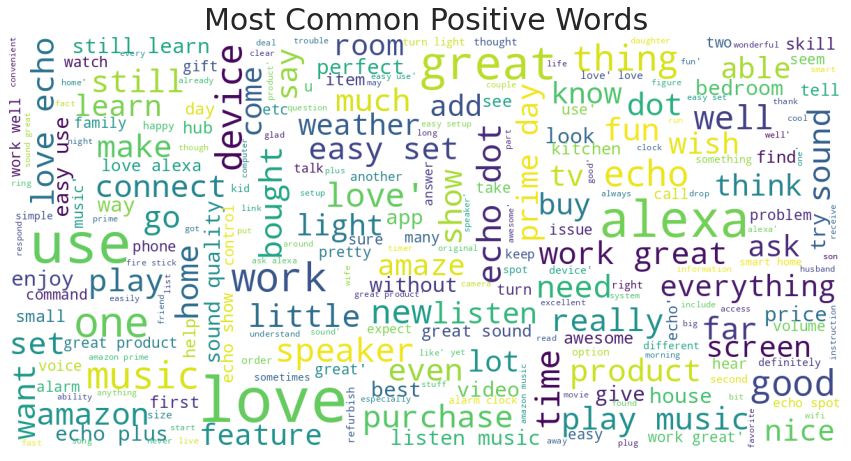

In [ ]:
# wordcload for positive words 
create_WordCloud(Positive_words,back_ground_color="white",title="Most Common Positive Words")

In [ ]:
# Top 15 words are in positive reviews
freq_pos=nltk.FreqDist(Positive_words)
freq_pos.most_common(15)

[('love', 89),
 ('', 63),
 ('work great', 21),
 ('great product', 19),
 ('great', 14),
 ('easy set', 13),
 ('like', 12),
 ('love everything', 8),
 ('love echo', 7),
 ('really like', 7),
 ('love love love', 6),
 ('expect', 6),
 ('love alexa', 6),
 ('amaze', 6),
 ('absolutely love', 6)]

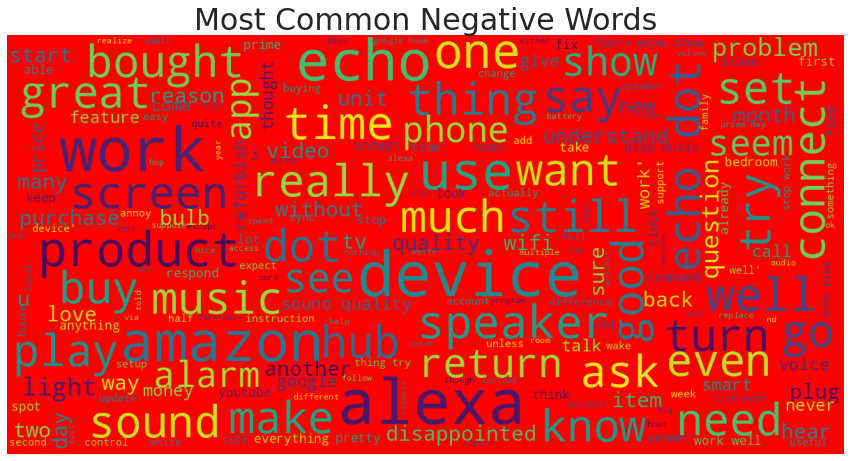

In [ ]:
# wordcload for negative words 
create_WordCloud(Negative_words,back_ground_color="red",title="Most Common Negative Words")

In [ ]:
# Top 15 words are in negative reviews
freq_neg=nltk.FreqDist(Negative_words)
freq_neg.most_common(10)

[('', 33),
 ('speaker could well', 4),
 ('without use many feature ipad see use great alarm u almost hear alarm bedroom living room reason enough keep fun ask random question hear response seem yet',
  2),
 ('get second unit bedroom expect sound improve didnt really see difference overall big improvement st generation',
  2),
 ('speaker sound pretty good small setup pretty easy bought two reason rate follow instruction music unit know do correctly sync purchasing multiple unit',
  2),
 ('like siri fact siri answer alexa see real need household though good prime day deal',
  2),
 ('different apple play specific list music must amazon spotify plus prime etc account must pay play music star reason everything else',
  2),
 ('like google well', 2),
 ('sound terrible u want good music get bose', 2),
 ('much feature', 2)]

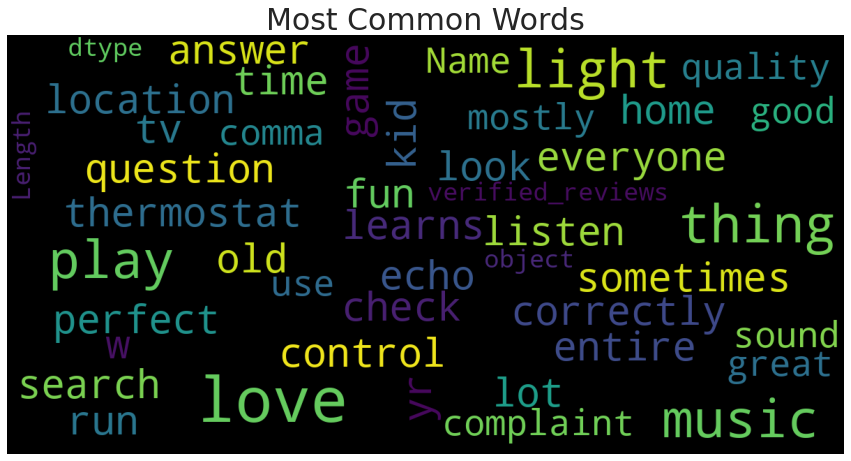

In [ ]:
# wordcload for all words 
create_WordCloud(data["verified_reviews"],title="Most Common Words")

In [ ]:
# Top 15 words  in reviews
freq_allwords=nltk.FreqDist(data["verified_reviews"])
freq_allwords.most_common(15)

[('', 96),
 ('love', 89),
 ('work great', 21),
 ('great product', 19),
 ('great', 14),
 ('easy set', 13),
 ('like', 12),
 ('love everything', 8),
 ('love echo', 7),
 ('good', 7),
 ('really like', 7),
 ('love love love', 6),
 ('expect', 6),
 ('love alexa', 6),
 ('amaze', 6)]

#### <span style="color:#5642C5;"> **6.3 Split data to Train & Test** </span> <a class="anchor"  id="split"></a>

 we split the data into train and test sets:
    
*   80% for training

*   20% for testing

In [ ]:

x_train , x_test , y_train , y_test = train_test_split(data["verified_reviews"] ,categories,stratify=categories, test_size= 0.20,random_state=42)

> **In order to run machine learning models we have to convert the text in review to numerical feature vectors**

#### <span style="color:#5642C5;"> **6.4 Vectorization** </span> <a class="anchor"  id="vector"></a>


###### <span style="color:#5642C5;"> 6.4.1 count vectorizer </span> <a class="anchor"  id="count_vec.6.4.1"></a>

> count vectorizer is a great technique from scikit-learn library. It is used to convert a given text to a vector based on the number of words occurring in the text as a whole.


In [ ]:
# here we create new CountVectorizer, which will help us understand and count the words.and it has different ways to use it, but we will only use it with  2-3 gram 
count_vec= CountVectorizer(ngram_range=(1,2))
# vectorizer to read the train text for us
x_train_features= count_vec.fit_transform(x_train)
x_train_features = x_train_features.toarray() #to get the frequincy of the words 

In [ ]:
# print the features in count vectorizer with 2 -3 combination of words
print(count_vec.get_feature_names())

['ability', 'ability adjust', 'ability alexa', 'ability contact', 'ability control', 'ability create', 'ability day', 'ability example', 'ability fall', 'ability listen', 'ability make', 'ability multiple', 'ability music', 'ability night', 'ability play', 'ability respond', 'ability see', 'ability shopping', 'ability talk', 'able', 'able access', 'able add', 'able alexa', 'able answer', 'able bonus', 'able buy', 'able completely', 'able connect', 'able contact', 'able control', 'able download', 'able easily', 'able follow', 'able get', 'able hear', 'able hook', 'able idea', 'able install', 'able instruction', 'able link', 'able listen', 'able make', 'able manage', 'able name', 'able play', 'able put', 'able read', 'able see', 'able set', 'able shout', 'able start', 'able sync', 'able talk', 'able tell', 'able turn', 'able use', 'able voice', 'able watch', 'absolutely', 'absolutely amaze', 'absolutely everything', 'absolutely great', 'absolutely love', 'absolutely response', 'accent', 

In [ ]:
x_train_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test_features=count_vec.transform(x_test)

###### <span style="color:#5642C5;"> 6.4.2 TF-IDF Vectorization </span> <a class="anchor"  id="TF-IDF"></a>

> This is a frequently used approach for converting text to a meaningful representation of numbers.


In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_Tfid = tfidf_vectorizer.fit_transform(x_train)
X_test_Tfid = tfidf_vectorizer.transform(x_test)


In [ ]:
tfidf_vectorizer.get_feature_names()

['ability',
 'ability adjust',
 'ability alexa',
 'ability contact',
 'ability control',
 'ability create',
 'ability day',
 'ability example',
 'ability fall',
 'ability listen',
 'ability make',
 'ability multiple',
 'ability music',
 'ability night',
 'ability play',
 'ability respond',
 'ability see',
 'ability shopping',
 'ability talk',
 'able',
 'able access',
 'able add',
 'able alexa',
 'able answer',
 'able bonus',
 'able buy',
 'able completely',
 'able connect',
 'able contact',
 'able control',
 'able download',
 'able easily',
 'able follow',
 'able get',
 'able hear',
 'able hook',
 'able idea',
 'able install',
 'able instruction',
 'able link',
 'able listen',
 'able make',
 'able manage',
 'able name',
 'able play',
 'able put',
 'able read',
 'able see',
 'able set',
 'able shout',
 'able start',
 'able sync',
 'able talk',
 'able tell',
 'able turn',
 'able use',
 'able voice',
 'able watch',
 'absolutely',
 'absolutely amaze',
 'absolutely everything',
 'absolutely

In [ ]:

X_train_Tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**We will be using helper functions from my GitHub to use in modelling part**

https://raw.githubusercontent.com/Mohamed1-2/TensorFlow-Helper-Functions/master/Helper_functions.py

In [ ]:
!wget https://raw.githubusercontent.com/Mohamed1-2/TensorFlow-Helper-Functions/master/Helper_functions.py


--2022-01-18 18:00:04--  https://raw.githubusercontent.com/Mohamed1-2/TensorFlow-Helper-Functions/master/Helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10977 (11K) [text/plain]
Saving to: ‘Helper_functions.py’

Helper_functions.py 100%[===================>]  10.72K  --.-KB/s    in 0s      

2022-01-18 18:00:04 (69.9 MB/s) - ‘Helper_functions.py’ saved [10977/10977]



## <span style="color:#5642C5;"> 7. MODELLING (MACHINE LEARNING & DEEP LEARNING) </span> <a class="anchor"  id="modelling"></a>


#### <span style="color:#5642C5;"> **7.1 Machine Learning** </span> <a class="anchor"  id="ml.7.1"></a>

In Machine learning modelling we will be useing Multinomial Naive Bayes Classifer from sklearn , and will be useing both Vectorization approches  

In [ ]:
# import confusion_matrix from github 
from Helper_functions import make_confusion_matrix 

###### <span style="color:#5642C5;"> **7.1.1 Multinomial Naive Bayes with count vectorizer** </span> <a class="anchor"  id="mnp_count.7.1.1"></a>


In [ ]:
# create MultinomialNB object 
mnb_count = MultinomialNB()
# fit on x_train and y_train
mnb_count.fit(x_train_features,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

Accuracy:90.48
F1 score:69.62
Recall:64.45
Precision:91.35
roc_auc_score:64.45

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.29      0.44        82
           1       0.90      1.00      0.95       548

    accuracy                           0.90       630
   macro avg       0.91      0.64      0.70       630
weighted avg       0.91      0.90      0.88       630


 confussion matrix:
 None


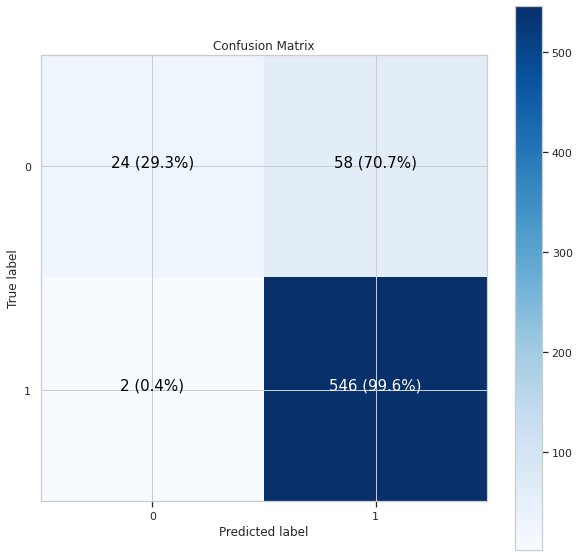

In [ ]:
model_score = {}

# get the score of the model 
y_pred_mnb_count = mnb_count.predict(x_test_features)
scores1=round(accuracy_score(y_test,y_pred_mnb_count)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_pred_mnb_count, average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_mnb_count, average='macro')*100,2)
print ("Recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_mnb_count, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_mnb_count, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5)) 
print ('\n clasification report:\n', classification_report(y_test,y_pred_mnb_count))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_mnb_count))
model_score["Naive Bayes with count vectorizer"] = [scores1, scores2,  scores3,scores4,scores5]

In [ ]:
# custom reviews will be use later to compare the models 
review_1 = 'Its not like Siri, Siri answers more accurately then Alexa.'
review_2="i think siri device is better . this device is useless "
review_3=" I’ve have Echoes all over the house...I didn't have any problem"
review_4="I like it very much! Thank you for great quality product with cheaper price!"
review_5="Love it! Just takes some time to configure it but it is fabulous! Thank you!"
review_6="when i give any command Alexa goes on search mode and minewhile it also gets the sorrounding sound and Alexa belives it as it's command.. So finally the search result is Nothing"
reviews=[review_1,review_2,review_3,review_4,review_5,review_6]

###### <span style="color:#5642C5;"> **7.1.1.1 Test the model with custom reviews** </span> <a class="anchor"  id="test_model_1.7.1.2"></a>

In [ ]:

results={}
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_count=count_vec.transform([review]).toarray()
    prediction= mnb_count.predict(text_count)
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["Naive Bayes with count vectorizer"] =preds
     

###### <span style="color:#5642C5;"> **7.1.2 Multinomial Naive Bayes with TF-IDF Vectorizer** </span> <a class="anchor"  id="mnp_tf.7.1.2"></a>


In [ ]:
# create MultinomialNB object 
mnb_Tfid = MultinomialNB()
# fit on x_train and y_train
mnb_Tfid.fit(X_train_Tfid, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

Accuracy:86.98
F1 score:46.52
Recall:50.0
Precision:43.49
roc_auc_score:50.0

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.87      1.00      0.93       548

    accuracy                           0.87       630
   macro avg       0.43      0.50      0.47       630
weighted avg       0.76      0.87      0.81       630


 confussion matrix:
 None


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


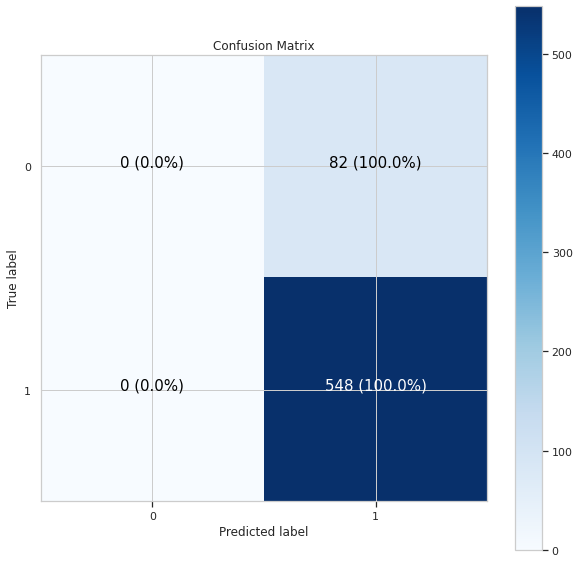

In [ ]:
# Get the predicited probability of testing data
y_pred_Tfid_mnb = mnb_Tfid.predict(X_test_Tfid)
scores1=round(accuracy_score(y_test,y_pred_Tfid_mnb)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_pred_Tfid_mnb, average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_Tfid_mnb, average='macro')*100,2)
print ("Recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_Tfid_mnb, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_Tfid_mnb, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5)) 
print ('\n clasification report:\n', classification_report(y_test,y_pred_Tfid_mnb))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_Tfid_mnb))
model_score["Naive Bayes with TF-IDF vectorizer"] = [scores1, scores2,  scores3,scores4,scores5]

###### <span style="color:#5642C5;"> **7.1.2.1 Test the model with custom reviews** </span> <a class="anchor"  id="test_model_2.7.1.2.1"></a>

In [ ]:
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_tfidf=tfidf_vectorizer.transform([review]).toarray()
    prediction= mnb_Tfid.predict(text_count)
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["Naive Bayes with TF-IDF Vectorizer"] =preds

###### <span style="color:#5642C5;"> **7.1.3 Support Vector Machine with Count Vectorizor** </span> <a class="anchor"  id="svm_count"></a>


In [ ]:
svc_count = LinearSVC( class_weight="balanced")

svc_count.fit(x_train_features,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(class_weight='balanced')

Accuracy:89.84
F1 score:78.66
recall:80.16
Precision:77.38
roc_auc_score:80.16

 clasification report:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63        82
           1       0.95      0.93      0.94       548

    accuracy                           0.90       630
   macro avg       0.77      0.80      0.79       630
weighted avg       0.90      0.90      0.90       630


 confussion matrix:
 None


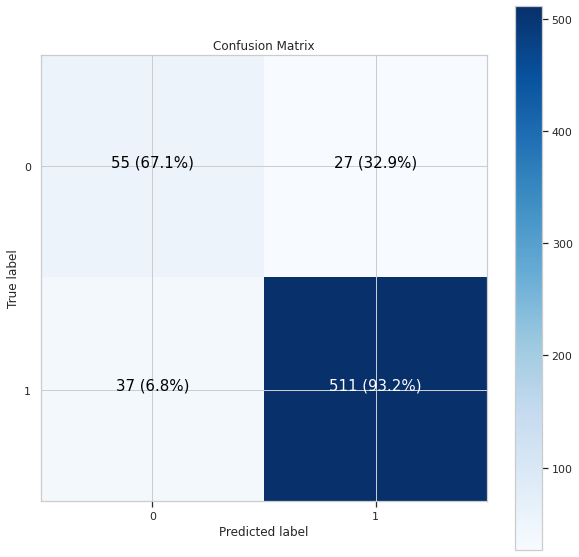

In [ ]:
y_pred_count_svc = svc_count.predict(x_test_features)
scores1=round(accuracy_score(y_pred_count_svc,y_test)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_pred_count_svc,y_test, average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_count_svc, average='macro')*100,2)
print ("recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_count_svc, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_count_svc, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5)) 
print ('\n clasification report:\n', classification_report(y_test,y_pred_count_svc))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_count_svc))
model_score["Support Vector Machine with Count Vectorizor"] = [scores1, scores2,  scores3,scores4,scores5]

###### <span style="color:#5642C5;"> **7.1.3.1 Test the model with custom reviews** </span> <a class="anchor"  id="svm_count.7.1.3.1"></a>

In [ ]:
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_count=count_vec.transform([review]).toarray()
    prediction= svc_count.predict(text_count)
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["SVM with Count Vectorizor"] =preds

###### <span style="color:#5642C5;"> **7.1.4 Support Vector Machine with TF-IDF Vectorizer** </span> <a class="anchor"  id="svm_tf"></a>


In [ ]:
svc_Tfid = LinearSVC( class_weight="balanced")

svc_Tfid.fit(X_train_Tfid, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearSVC(class_weight='balanced')

Accuracy:91.75
F1 score:81.77
recall:81.77
Precision:81.77
roc_auc_score:81.77

 clasification report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        82
           1       0.95      0.95      0.95       548

    accuracy                           0.92       630
   macro avg       0.82      0.82      0.82       630
weighted avg       0.92      0.92      0.92       630


 confussion matrix:
 None


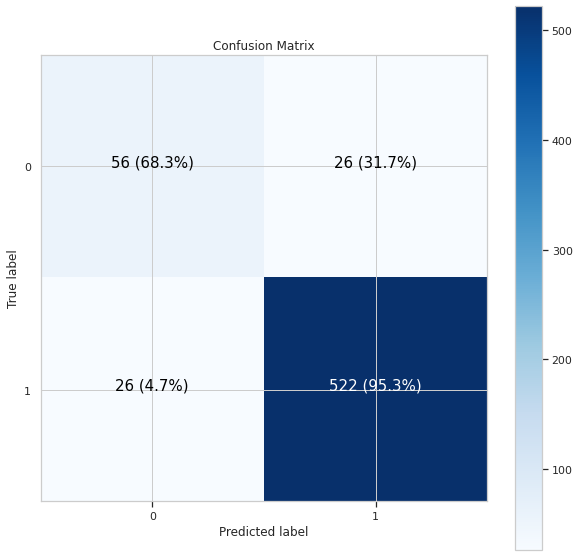

In [ ]:
y_pred_Tfid_svc = svc_Tfid.predict(X_test_Tfid)
scores1=round(accuracy_score(y_test,y_pred_Tfid_svc)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_pred_Tfid_svc, average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_Tfid_svc, average='macro')*100,2)
print ("recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_Tfid_svc, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_Tfid_svc, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5)) 
print ('\n clasification report:\n', classification_report(y_test,y_pred_Tfid_svc))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_Tfid_svc))
model_score["Support Vector Machine with TF-IDF Vectorizer "] = [scores1, scores2,  scores3,scores4,scores5]


###### <span style="color:#5642C5;"> **7.1.4.1 Test the model with custom reviews** </span> <a class="anchor"  id="svm_tf.7.1.4.1"></a>

In [ ]:
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_count=tfidf_vectorizer.transform([review]).toarray()
    prediction= svc_Tfid.predict(text_count)
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["SVM with TF-IDF Vectorizer"] =preds

###### <span style="color:#5642C5;"> **7.1.5 AdaBoost with Count Vectorizor** </span> <a class="anchor"  id="AdaBoost_count"></a>





In [ ]:
# We'll use 100 weak learners to build a strong learner and using DecisionTreeClassifier as base estimtor
adaboost_classifier_count = AdaBoostClassifier(n_estimators=100,base_estimator=DecisionTreeClassifier() )

adaboost_classifier_count.fit(x_train_features,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

Accuracy:90.79
F1 score:74.06
Recall:69.3
Precision:85.12
roc_auc_score:69.3

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.40      0.53        82
           1       0.92      0.98      0.95       548

    accuracy                           0.91       630
   macro avg       0.85      0.69      0.74       630
weighted avg       0.90      0.91      0.89       630


 confussion matrix:
 None


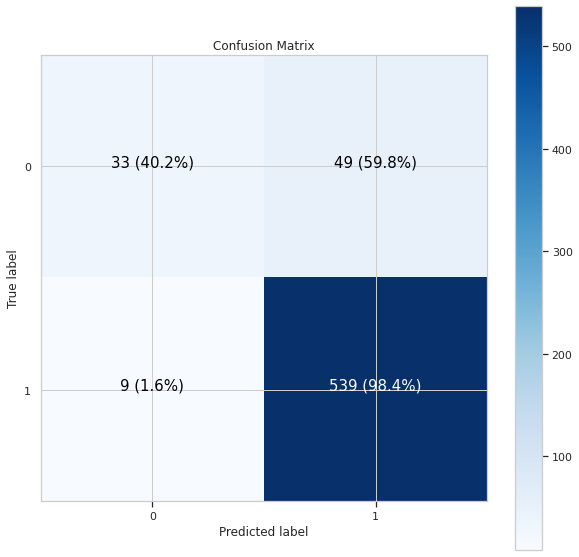

In [ ]:
y_pred_count_adaboost = adaboost_classifier_count.predict(x_test_features)
scores1=round(accuracy_score(y_test,y_pred_count_adaboost)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_pred_count_adaboost, average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_count_adaboost, average='macro')*100,2)
print ("Recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_count_adaboost, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_count_adaboost, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5))

print ('\n clasification report:\n', classification_report(y_test,y_pred_count_adaboost))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_count_adaboost))
model_score["AdaBoost with Count Vectorizor"] = [scores1, scores2,  scores3,scores4,scores5]

###### <span style="color:#5642C5;"> **7.1.5.1 Test the model with custom reviews** </span> <a class="anchor"  id="test_model_5.7.1.5.1"></a>

In [ ]:
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_count=count_vec.transform([review]).toarray()
    prediction= adaboost_classifier_count.predict(text_count)
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["adaboost with count Vectorizer"] =preds

###### <span style="color:#5642C5;"> **7.1.5 AdaBoost with TF-IDF Vectorizer** </span> <a class="anchor"  id="AdaBoost_tf"></a>



In [ ]:
# We'll use 100 weak learners to build a strong learner
adaboost_classifier_Tfid = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100)

adaboost_classifier_Tfid.fit(X_train_Tfid,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

Accuracy:90.95
F1 score:73.55
Recall:68.35
Precision:87.59
roc_auc_score:68.35

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.38      0.52        82
           1       0.91      0.99      0.95       548

    accuracy                           0.91       630
   macro avg       0.88      0.68      0.74       630
weighted avg       0.90      0.91      0.89       630


 confussion matrix:
 None


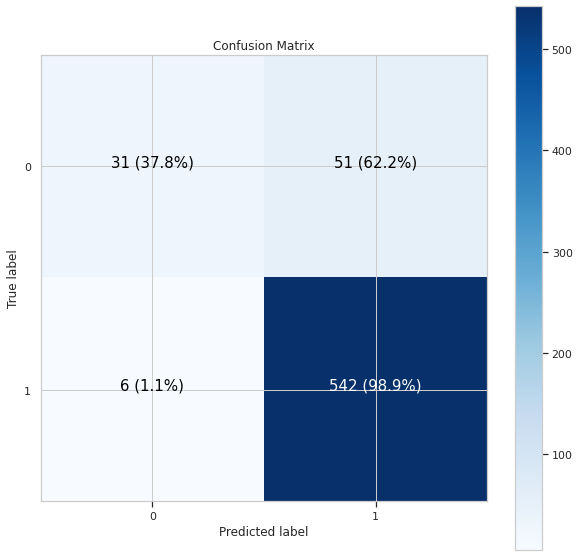

In [ ]:
y_pred_Tfid_adaboost = adaboost_classifier_Tfid.predict(X_test_Tfid)
scores1=round(accuracy_score(y_test,y_pred_Tfid_adaboost)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_pred_Tfid_adaboost ,average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_pred_Tfid_adaboost, average='macro')*100,2)
print ("Recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_pred_Tfid_adaboost, average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_pred_Tfid_adaboost, average='macro')*100,2)
print ("roc_auc_score:{}".format(scores5))

print ('\n clasification report:\n', classification_report(y_test,y_pred_Tfid_adaboost))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_pred_Tfid_adaboost))
model_score["AdaBoost with TF-IDF Vectorizer "] = [scores1, scores2,  scores3,scores4,scores5]

###### <span style="color:#5642C5;"> **7.1.6.1 Test the model with custom reviews** </span> <a class="anchor"  id="test_model_6.7.1.6.1"></a>

In [ ]:
preds=[]
for ind ,review in enumerate(reviews) :
    review = clean_reviews(review)
    text_count=tfidf_vectorizer.transform([review]).toarray()
    prediction= adaboost_classifier_Tfid.predict(text_count)
    
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"

    else:
        pred = "Negative"
    preds+=[pred]
results["adaboost with TF-IDF Vectorizer"] =preds

#### <span style="color:#5642C5;"> **7.2 Deep learning** </span> <a class="anchor"  id="machinelearnig"></a>


##### <span style="color:#5642C5;"> **7.2.1 CNN and LSTM Model** </span> <a class="anchor"  id="cnn_lstm_model"></a>

In Deep learning modelling we will be using CNN (Convolutional neural networks) with LSTM (Long Short-Term Memory)model . CNN are particularly good at detecting spatial structure in data. The sequence of words in reviews has a one-dimensional spatial structure, and the CNN could be able to chose out invariant features for positive and negative sentiment. An LSTM layer can then learn sequences from the learned spatial features.

The Model Architecture :
*  The 1st layer of the model is Embedding layer which uses the 100 length vector.the Embedding layer is initialized with random weights and will learn an embedding for all of the words in the train data
*  The 2nd layer is Conv1D with 32 convolution kernels and 2 kernel size 
*  The 3rd layer is MaxPooling1D with 2 poolsize
*  The 4nd layer is  LSTM layer with 256 neurons which will work as the memory unit of the model. 
*  ouput layer with 1 unit "Sigmoid function " which will helps in providing the labels .

By using LSTM we dont need to use preprocessing taskes such as stopwords elimination coz this network have its own special feature for elimination of unnecessary information.It also has another feature: LSTM has a capability that allows it to memorise the data sequence.this features makes LSTM a powerful tool for text classification . 

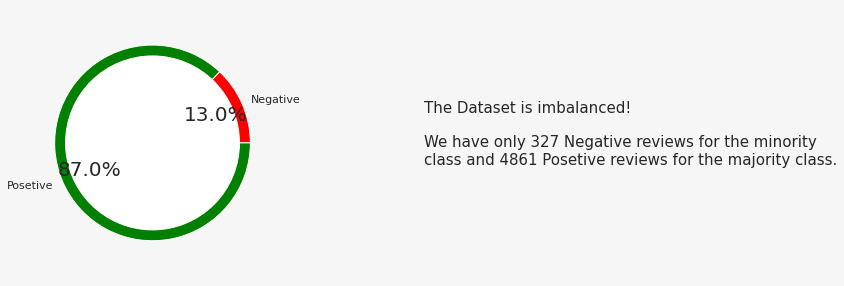

In [ ]:
# get the class weight 
fig = plt.figure(figsize=(14,5),facecolor='#f7f6f6',)
axes = plt.subplot2grid((1,1),(0,0))

plt.pie(x = [len(y_train[y_train == 0]), len(y_train[y_train == 1])],
        pctdistance=0.70,labels = ['Negative','Posetive'], autopct='%1.1f%%',
        colors = ['red','green'], labeldistance= 1.1, radius = 0.9,)

centre_circle = plt.Circle((0,0),0.8,fc='white') 

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# plt.tight_layout()
plt.text(2.5,-0.2,f'The Dataset is imbalanced!\n\nWe have only 327 Negative reviews for the minority \nclass and 4861 Posetive reviews for the majority class.', fontsize=15)
plt.show()

In [ ]:
# find the length of the largest sentence in training data
max_len = max(x_train, key = len)
print(f'Max number of words in a text in training data: {len(max_len)}')


Max number of words in a text in training data: 1363



###### <span style="color:#5642C5;"> **7.2.1.1 Padding and truncating the input training sequences** </span> <a class="anchor"  id="padding"></a>

the use of padding is to ensure that all sequences have the same length,and we will be assign the maximum length of each sequence (max_len) to the length of the largest sentence in the train data 


In [ ]:
# Convert reviews to padded sequences

#We choose 10000 repeated words in corpus for tokenizing.
max_words = 100000
tokenizer = Tokenizer(num_words = max_words)
# create the vocabulary by fitting on X_train text
tokenizer.fit_on_texts(x_train)
# get the sequence of tokens
xtrain_seq = tokenizer.texts_to_sequences(x_train)
xtest_seq = tokenizer.texts_to_sequences(x_test)
# padding the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=len(max_len))
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=len(max_len))
word_index = tokenizer.word_index




In [ ]:
#get a random example
print('train review num 10:', x_train[9])
print('before padding:', xtrain_seq[9])
print('after padding:', xtrain_pad[9])

train review num 10: love listen song heard since get news weather information great
before padding: [1, 8, 147, 228]
after padding: [  0   0   0 ...   8 147 228]


In [ ]:
# data shape after padding
print(xtrain_pad.shape)
print (xtest_pad.shape)
print (y_train.shape)
print (y_test.shape)

(2520, 1363)
(630, 1363)
(2520, 1)
(630, 1)


In [ ]:
#creating Word Index
tokenizer.word_index

{'love': 1,
 'echo': 2,
 'great': 3,
 'use': 4,
 'work': 5,
 'alexa': 6,
 'music': 7,
 'like': 8,
 'get': 9,
 'sound': 10,
 'one': 11,
 'dot': 12,
 'device': 13,
 'set': 14,
 'easy': 15,
 'well': 16,
 'play': 17,
 'speaker': 18,
 'product': 19,
 'thing': 20,
 'good': 21,
 'amazon': 22,
 'time': 23,
 'home': 24,
 'show': 25,
 'would': 26,
 'still': 27,
 'new': 28,
 'light': 29,
 'bought': 30,
 'really': 31,
 'prime': 32,
 'make': 33,
 'day': 34,
 'smart': 35,
 'need': 36,
 'ask': 37,
 'purchase': 38,
 'much': 39,
 'also': 40,
 'go': 41,
 'quality': 42,
 'fun': 43,
 'far': 44,
 'learn': 45,
 'want': 46,
 'room': 47,
 'even': 48,
 'listen': 49,
 'connect': 50,
 'turn': 51,
 'say': 52,
 'plus': 53,
 'alarm': 54,
 'house': 55,
 'tv': 56,
 'everything': 57,
 'try': 58,
 'buy': 59,
 'feature': 60,
 'know': 61,
 'screen': 62,
 'spot': 63,
 'voice': 64,
 'video': 65,
 'weather': 66,
 'able': 67,
 'look': 68,
 'could': 69,
 'little': 70,
 'hub': 71,
 'tell': 72,
 'add': 73,
 'nice': 74,
 'think'

In [ ]:
#check a random word in the word index
tokenizer.word_index["alexa"]

6

In [ ]:
# create the model 
def create_model():
    

        model = tf.keras.models.Sequential([tf.keras.layers.Embedding(max_words, 100, input_length=max_words),
                                        tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'),
                                        tf.keras.layers.MaxPooling1D(pool_size=2),
                                        tf.keras.layers.LSTM(256),
                                        tf.keras.layers.Dense(1, activation='sigmoid')
                                        
                            
                                       
    
           ])

        model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(3e-4), metrics=['accuracy'])
        return model
model=create_model()
model.summary()


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100000, 100)       10000000  
_________________________________________________________________
conv1d (Conv1D)              (None, 100000, 32)        6432      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50000, 32)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               295936    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 10,302,625
Trainable params: 10,302,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
clear_session()

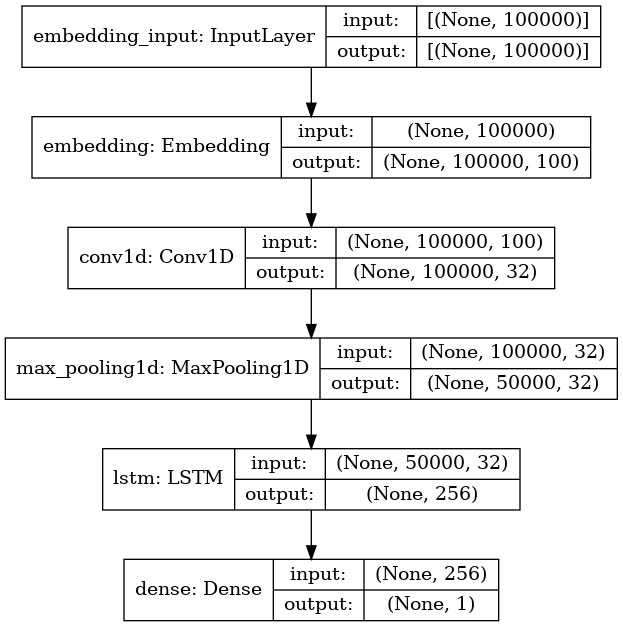

In [ ]:
# print the block diagram of our model
plot_model(model, to_file='modelplot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# create model checkpoint and callbacks to save the model weights when validation accuracy is maximum
callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=2, mode='auto',
    baseline=None, restore_best_weights=True)
#fit the model
hist = model.fit(xtrain_pad,y_train, validation_data=(xtest_pad, y_test),class_weight= {0:87, 1:13},epochs=10, batch_size=32)

2022-01-18 18:04:33.842816: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
79/79 [==============================] - 111s 1s/step - loss: 15.3539 - accuracy: 0.7524 - val_loss: 0.6887 - val_accuracy: 0.6587
Epoch 2/10
79/79 [==============================] - 106s 1s/step - loss: 13.8707 - accuracy: 0.7214 - val_loss: 0.4953 - val_accuracy: 0.8429
Epoch 3/10
79/79 [==============================] - 109s 1s/step - loss: 11.6069 - accuracy: 0.8591 - val_loss: 0.4374 - val_accuracy: 0.8587
Epoch 4/10
79/79 [==============================] - 109s 1s/step - loss: 7.4232 - accuracy: 0.8972 - val_loss: 0.2988 - val_accuracy: 0.8873
Epoch 5/10
79/79 [==============================] - 109s 1s/step - loss: 5.7014 - accuracy: 0.9067 - val_loss: 0.4326 - val_accuracy: 0.7841
Epoch 6/10
79/79 [==============================] - 109s 1s/step - loss: 4.3994 - accuracy: 0.9250 - val_loss: 0.3161 - val_accuracy: 0.8444
Epoch 7/10
79/79 [==============================] - 109s 1s/step - loss: 3.6417 - accuracy: 0.9194 - val_loss: 0.2904 - val_accuracy: 0.8556
Epoch 8/10

> Awesome 😍🦾, it reached 90% val accuracy after 10 epochs of training.


Accuracy:90.0
F1 score:79.29
Recall:81.29
Precision:77.66
roc_score:81.29

 clasification report:
               precision    recall  f1-score   support

           0       0.60      0.70      0.64        82
           1       0.95      0.93      0.94       548

    accuracy                           0.90       630
   macro avg       0.78      0.81      0.79       630
weighted avg       0.91      0.90      0.90       630


 confussion matrix:
 None


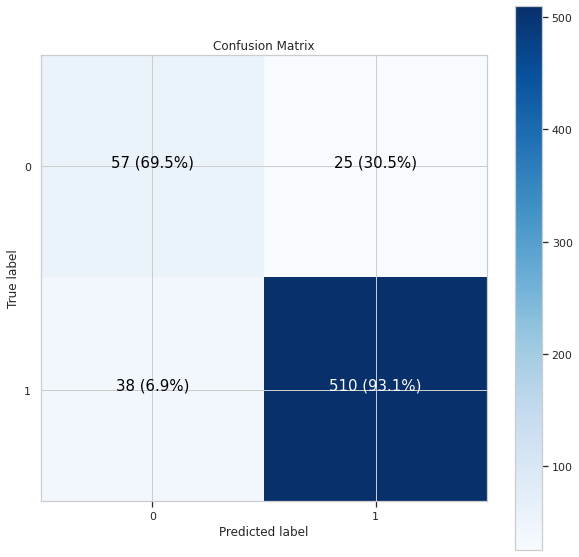

In [ ]:
# predict probabilities for test set
y_probs = model.predict(xtest_pad, verbose=0)
# predict classes for test set
y_classes = (model.predict(xtest_pad) > 0.5).astype("int32")
y_train_pred=(model.predict(xtrain_pad) >= 0.5).astype("int32")
# reduce the 2D prediction arrays to 1D arrays to work with scikit-learn metrics API
y_probs = y_probs[:, 0]
y_classes = y_classes[:, 0]

scores1=round(accuracy_score(y_test,y_classes)*100,2)
print ("Accuracy:{}".format(scores1))
scores2=round(f1_score(y_test,y_classes,  average='macro')*100,2)
print ("F1 score:{}".format(scores2))
scores3=round(recall_score(y_test,y_classes, average='macro')*100,2)
print ("Recall:{}".format(scores3))
scores4=round(precision_score(y_test,y_classes,  average='macro')*100,2)
print ("Precision:{}".format(scores4))
scores5=round(roc_auc_score(y_test,y_classes,  average='macro')*100,2)
print ("roc_score:{}".format(scores5))

print ('\n clasification report:\n', classification_report(y_test,y_classes))
print ('\n confussion matrix:\n',make_confusion_matrix(y_test, y_classes))
model_score["CNN_LSTM Model"] = [scores1, scores2,  scores3,scores4,scores5]


In [ ]:
model.save('my_model.h5')

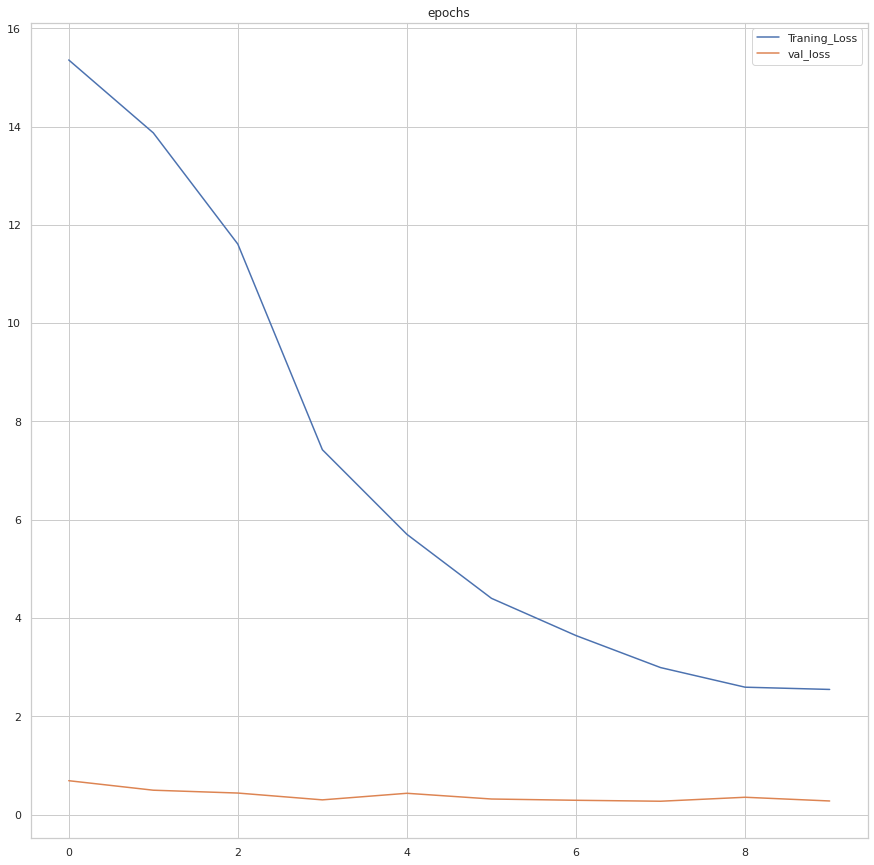

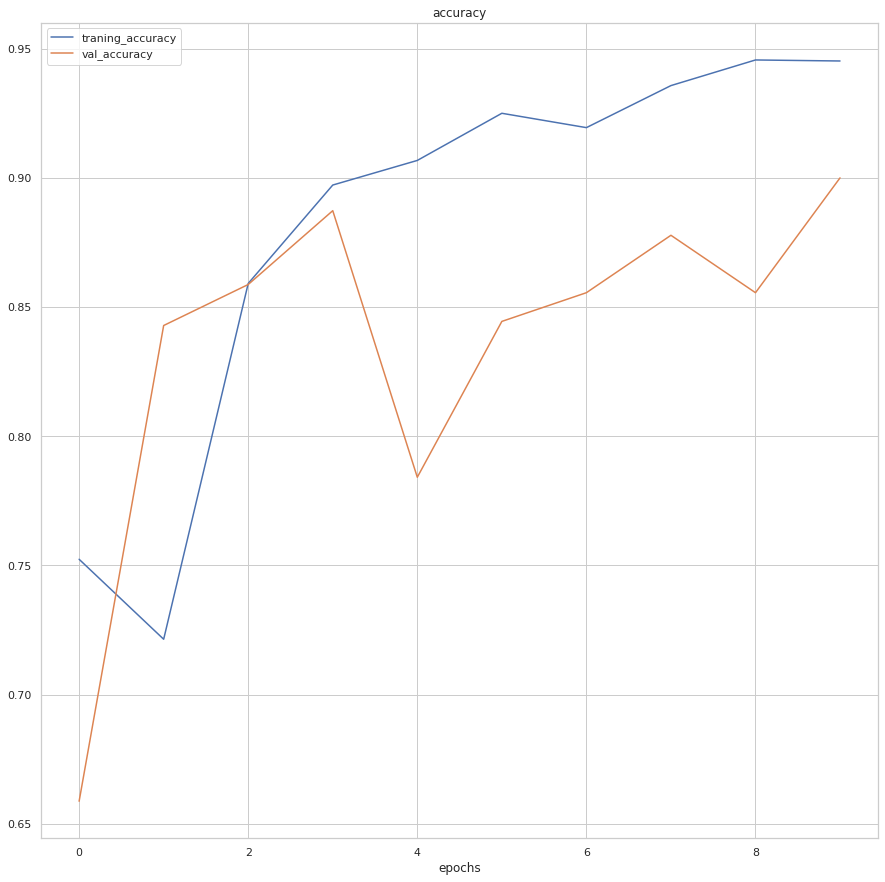

In [ ]:
from Helper_functions import plot_loss_curves 
# Plot loss curves
plot_loss_curves(hist)

In [ ]:
# Model evaluation 
train_nn_results = model.evaluate(xtrain_pad, y_train, verbose=0)
test_nn_results = model.evaluate(xtest_pad, y_test, verbose=0)
print(f'Train accuracy: {train_nn_results[1]*100:0.2f}')
print(f'Test accuracy: {test_nn_results[1]*100:0.2f}')

Train accuracy: 96.31
Test accuracy: 90.00


###### <span style="color:#5642C5;"> **7.1.2 Testing the Model** </span> <a class="anchor"  id="test_model"></a>



In [ ]:
preds=[]
def get_predictions(text):
    sequence = tokenizer.texts_to_sequences([text])
    # pad the sequences
    model_=load_model("./my_model.h5")
    sequence = pad_sequences(sequence, maxlen=max_words)
    # get the prediction
    prediction= model_.predict(sequence)[0]
    if (np.round(prediction,2) >= 0.5):
        pred = "Positive"
    else:
        pred = "Negative"
    return pred
for ind ,review in enumerate(reviews) :
    prediction =get_predictions(review)
    preds+=[prediction]
    results["CNN_LSTM_Model"] =preds 

## <span style="color:#5642C5;"> 8. RESULTS ✨🎉 </span> <a class="anchor"  id="results"></a>

> In this part, I  will test the result of the models with custom reviews and compare the accuracy of the models to see which model has highest accuracy
> 

#### <span style="color:#5642C5;"> 8.1 Model comparisons </span> <a class="anchor"  id="Modelcomparisons"></a>

> Let's compare the models'AUC Scores,Accuracy, Recall Scores,F1 Scores, and Precision Score

In [ ]:
score_df = pd.DataFrame(model_score).transpose()
score_df.rename(columns = {0 :'Accuracy', 1:'F1' , 2: 'Recall', 3:'precision_score' , 4:"roc_auc_score" }, inplace = True)
score_df.sort_values(by = 'roc_auc_score', ascending = False, inplace = True)

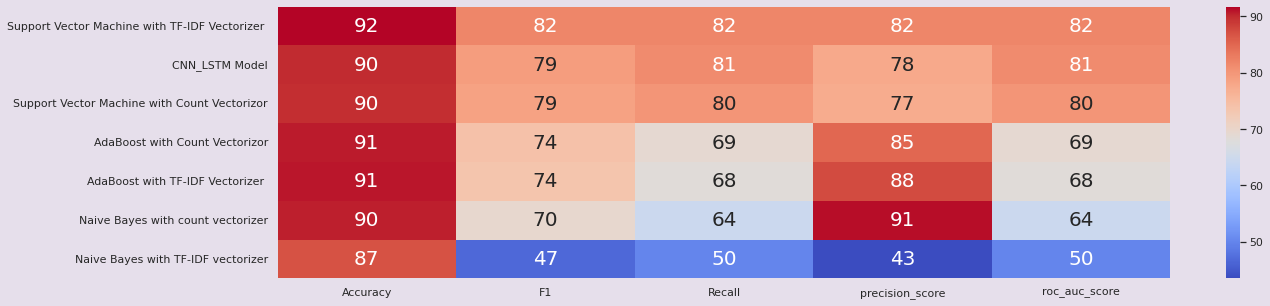

In [ ]:
fig = plt.figure(figsize=(20,5), facecolor = '#e6dfeb')
axes = plt.subplot2grid((1,1),(0,0))

sns.heatmap(data = score_df, cmap = 'coolwarm', annot = True,)
plt.show()

#### <span style="color:#5642C5;"> 8.2 Custom Reviews 👓 </span> <a class="anchor"  id="CustomReviews"></a>

> Here we will see the results of the models with the unseen data which are random reviews taken from the Internet to see how models perfurm inreal data.

 **Note**: *The rows in green are the rows that predict the correct labels* 

In [ ]:
df_reviews=pd.DataFrame(reviews,index=["Review 1","Review 2","Review 3","Review 4","Review 5","review 6"])
display(HTML(df_reviews.to_html()))
#print(reviews.values)
df=pd.DataFrame.from_dict(results, orient ='index',columns=["Review 1","Review 2","Review 3","Review 4","Review 5","review 6"])
df.style.set_table_styles([
                                {
                                    "selector" :".row2,.row3,.row6",
                                    "props": [("border","2px solid black"),
                                              ("color", "black"),
                                              ("background-color", "lightgreen")]
                                },
    {
        "selector":"thead",
                                        "props":"background-color:aqua; color:black; border:3px solid black;"

    }
   
                               ]
                             )

,0
Review 1,"Its not like Siri, Siri answers more accurately then Alexa."
Review 2,i think siri device is better . this device is useless
Review 3,I’ve have Echoes all over the house...I didn't have any problem
Review 4,I like it very much! Thank you for great quality product with cheaper price!
Review 5,Love it! Just takes some time to configure it but it is fabulous! Thank you!
review 6,when i give any command Alexa goes on search mode and minewhile it also gets the sorrounding sound and Alexa belives it as it's command.. So finally the search result is Nothing


,Review 1,Review 2,Review 3,Review 4,Review 5,review 6
Naive Bayes with count vectorizer,Negative,Negative,Positive,Positive,Positive,Positive
Naive Bayes with TF-IDF Vectorizer,Positive,Positive,Positive,Positive,Positive,Positive
SVM with Count Vectorizor,Negative,Negative,Positive,Positive,Positive,Negative
SVM with TF-IDF Vectorizer,Negative,Negative,Positive,Positive,Positive,Negative
adaboost with count Vectorizer,Positive,Negative,Positive,Positive,Positive,Positive
adaboost with TF-IDF Vectorizer,Positive,Positive,Positive,Positive,Positive,Negative
CNN_LSTM_Model,Negative,Negative,Negative,Positive,Positive,Negative


## <span style="color:#5642C5;"> 9. Conclusion </span> <a class="anchor"  id="Conclusion"></a>


**I tried a few different models in ML and a CNN with LSTM Model , but SVM with TF-IDF Vectorizer proved to be the most effective for this imbalanced dataset. Our model had a ROC AUC score of 0.82, Accuracy of 0.92, F1 of 0.82, Pecision of 0.82, and Recall of 0.82 .More feature engineering and model implementation can be performed to find a better performing model.**

  **Plz up vote if you like my work 🙈❤**